## Proyecto Marketing Analytics para empresa Fintech

## DESCRIPCIÓN DEL PROYECTO

Análisis de los datos de campañas de marketing de una empresa Fintech para
conseguir identificar patrones, tendencias y factores que influyen en que un
cliente acabe contratando un depósito. Tras un análisis exhaustivo de todos sus
datos, habrá que implementar un modelo simple que ayude a entender y predecir
la efectividad de las campañas de marketing, y diseñar un dashboard para la
capa ejecutiva de la fintech con los principales insights y KPIs de los resultados
de las campañas.

In [1]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import utils

# Expresiones regulares
import re
from fuzzywuzzy import process

c:\Users\dgdel.DESKTOP-MAOSMM4\anaconda3\envs\test\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df = pd.read_csv('bank-additional_bank-additional-full.csv', sep=';')
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

## 1.Análisi de datos

### Revisión general de los datos

In [3]:
utils.check_df(df)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 41,188 filas y 21 columnas.

##########################################################################################

¿Cuáles son las primeras 5 filas del conjunto de datos?


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]


##########################################################################################

¿Cuáles son las últimas cinco filas del conjunto de datos?


age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]


##########################################################################################

¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


age           job  marital          education  default housing loan  \
27462   44  entrepreneur  married  university.degree       no     yes   no   
36240   29        admin.  married        high.school       no     yes   no   
9614    43        admin.  married  university.degree  unknown     yes   no   
13237   43        admin.  married  university.degree  unknown     yes   no   
34706   31   blue-collar   single           basic.9y       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
27462   cellular   nov         fri  ...         4    999         0   
36240   cellular   jun         mon  ...         1    999         0   
9614   telephone   jun         mon  ...         3    999         0   
13237   cellular   jul         wed  ...        13    999         0   
34706   cellular   may         thu  ...         2    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
27462  nonexistent         -0.1          93.200          -42.0      4.021   
36240  nonexistent         -2.9          92.963          -40.8      1.266   
9614   nonexistent          1.4          94.465          -41.8      4.961   
13237  nonexistent          1.4          93.918          -42.7      4.962   
34706      failure         -1.8          92.893          -46.2      1.266   

       nr.employed    y  
27462       5195.8   no  
36240       5076.2  yes  
9614        5228.1   no  
13237       5228.1   no  
34706       5099.1   no  

[5 rows x 21 columns]


##########################################################################################

¿Cuál es el tipo de datos de cada columna?


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


##########################################################################################

¿Cuántas columnas hay de cada tipo de datos?


object     11
int64       5
float64     5
Name: count, dtype: int64


##########################################################################################

Variables numéricas:
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

##########################################################################################

Variables categóricas:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

##########################################################################################

¿Cuántos valores únicos tiene cada columna?


age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


##########################################################################################

Estadísticas descriptivas (numéricas):


age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000


##########################################################################################

Estadísticas descriptivas (categóricas):


job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548


##########################################################################################



(       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
 0       56       261         1    999         0           1.1          93.994   
 1       57       149         1    999         0           1.1          93.994   
 2       37       226         1    999         0           1.1          93.994   
 3       40       151         1    999         0           1.1          93.994   
 4       56       307         1    999         0           1.1          93.994   
 ...    ...       ...       ...    ...       ...           ...             ...   
 41183   73       334         1    999         0          -1.1          94.767   
 41184   46       383         1    999         0          -1.1          94.767   
 41185   56       189         2    999         0          -1.1          94.767   
 41186   44       442         1    999         0          -1.1          94.767   
 41187   74       239         3    999         1          -1.1          94.767   
 
        cons.c

### DATOS --> Valores nulos y/o faltantes y duplicados

In [4]:
utils.identificacion_valores_problem(df)

###################################################################################
3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:
age               0.0
campaign          0.0
nr.employed       0.0
euribor3m         0.0
cons.conf.idx     0.0
cons.price.idx    0.0
emp.var.rate      0.0
poutcome          0.0
previous          0.0
pdays             0.0
duration          0.0
job               0.0
day_of_week       0.0
month             0.0
contact           0.0
loan              0.0
housing           0.0
default           0.0
education         0.0
marital           0.0
y                 0.0
dtype: float64
###################################################################################
3.1.2. Número de DUPLICADOS totales: 12
###################################################################################
3.1.3. Columnas numéricas con OUTLIERS
Número de outliers en la columna "age": 469
Número de outliers en la columna "duration": 2963
Número de outliers e

### Estadistica  Descriptiva NUMERICA

In [5]:
df_copy = df.copy()

In [6]:
px.histogram(df_copy, x="age", nbins=20)

In [7]:

bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['0-25', '25-35', '35-45', '45-55', '55-65', '+65']

df_copy['intervalo_edad'] = pd.cut(
    df_copy['age'],
    bins=bins, 
    labels = labels,
    right = False,
    ordered=True
)


In [8]:
px.histogram(df_copy, 
             x='intervalo_edad',
             category_orders= {'intervalo_edad' : labels})


In [9]:
px.box(df_copy, y="duration")

In [10]:
px.histogram(df_copy,x='campaign',nbins=100)

In [11]:
px.histogram(df_copy,x='pdays',nbins=100)

In [12]:
px.violin(df_copy, y='euribor3m')

In [13]:
bins = [0,2,4,6]
labels = ['0-2','2-4','+5']

df_copy['intervalo_euribor'] = pd.cut(
    df_copy['euribor3m'],
    bins=bins, 
    labels = labels,
    right = False,
    ordered=True)

px.histogram(df_copy, 
             x='intervalo_euribor',
             category_orders= {'intervalo_euribor' : labels})

### Estadistica  Descriptiva Categorica

<Axes: xlabel='count', ylabel='education'>

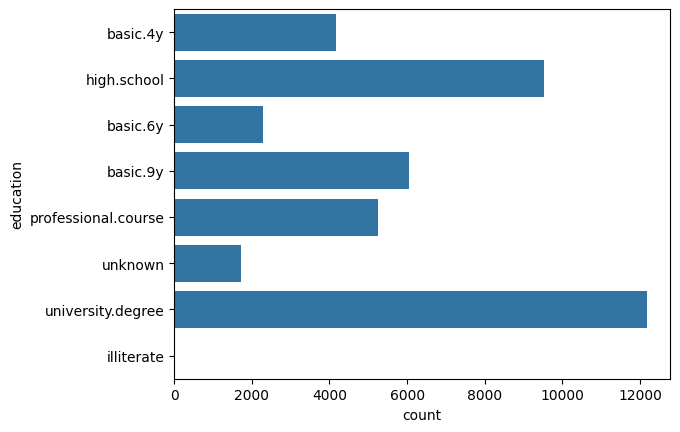

In [14]:
sns.countplot(y='education', data=df_copy)

<Axes: xlabel='count', ylabel='marital'>

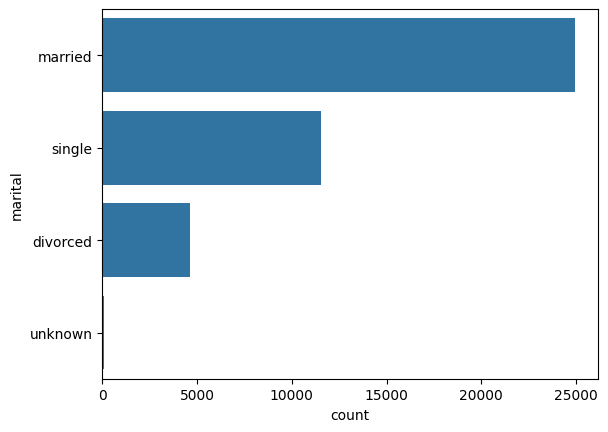

In [15]:
sns.countplot(y='marital', data=df_copy)

<Axes: xlabel='count', ylabel='job'>

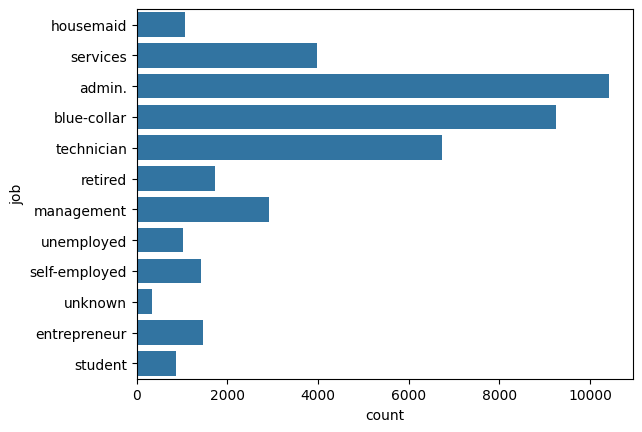

In [16]:
sns.countplot(y='job', data=df_copy)

<Axes: xlabel='month', ylabel='count'>

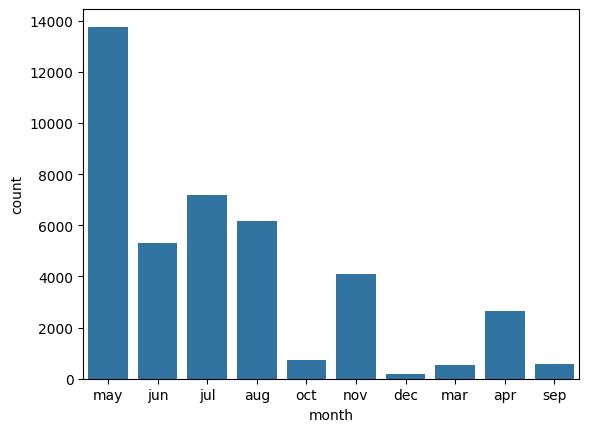

In [17]:
sns.countplot(x='month', data=df_copy)

In [18]:
estaciones = {
    'dec': 'Invierno', 'jan': 'Invierno', 'feb': 'Invierno',
    'mar': 'Primavera', 'apr': 'Primavera', 'may': 'Primavera',
    'jun': 'Verano', 'jul': 'Verano', 'aug': 'Verano',
    'sep': 'Otoño', 'oct': 'Otoño', 'nov': 'Otoño'
}
df_copy['estaciones'] = df_copy['month'].map(estaciones)

In [19]:
df_copy[['month','estaciones']]

month estaciones
0       may  Primavera
1       may  Primavera
2       may  Primavera
3       may  Primavera
4       may  Primavera
...     ...        ...
41183   nov      Otoño
41184   nov      Otoño
41185   nov      Otoño
41186   nov      Otoño
41187   nov      Otoño

[41188 rows x 2 columns]

<Axes: xlabel='estaciones', ylabel='count'>

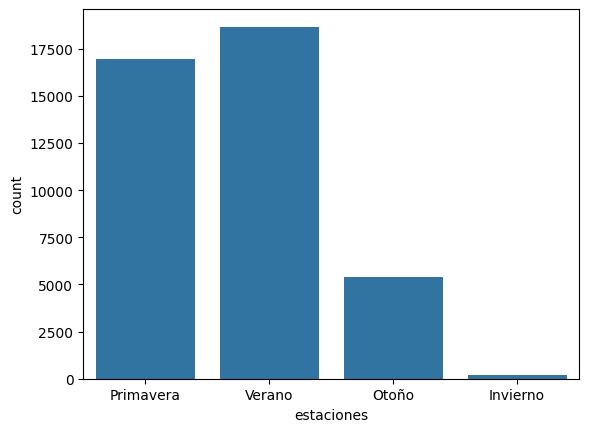

In [20]:
sns.countplot(x='estaciones', data=df_copy)

### Numerico VS Numerico

In [21]:
px.scatter(df_copy, x='age', y='campaign')

In [22]:
px.scatter(df_copy, x='euribor3m', y='campaign')

In [23]:
px.scatter(df_copy, x='cons.price.idx', y='campaign')

In [24]:
px.scatter(df_copy, x='nr.employed', y='euribor3m')

### Numerica vs Categorica

<Axes: xlabel='age', ylabel='education'>

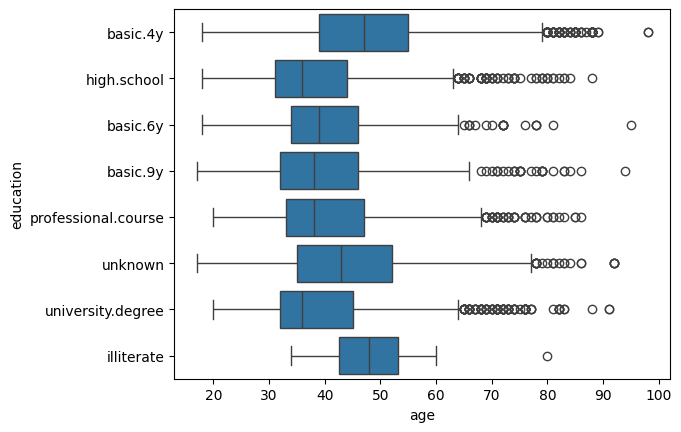

In [25]:
sns.boxplot(x='age', y='education', data=df_copy)

<Axes: xlabel='age', ylabel='job'>

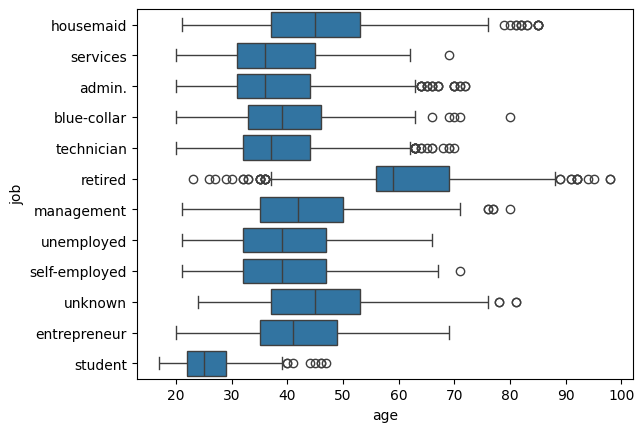

In [26]:
sns.boxplot(x='age', y='job', data=df_copy)

<Axes: xlabel='duration', ylabel='y'>

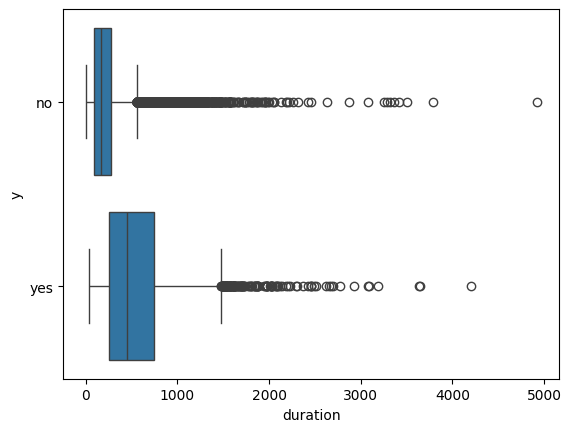

In [27]:
sns.boxplot(x='duration', y='y', data=df_copy)

<Axes: xlabel='campaign', ylabel='y'>

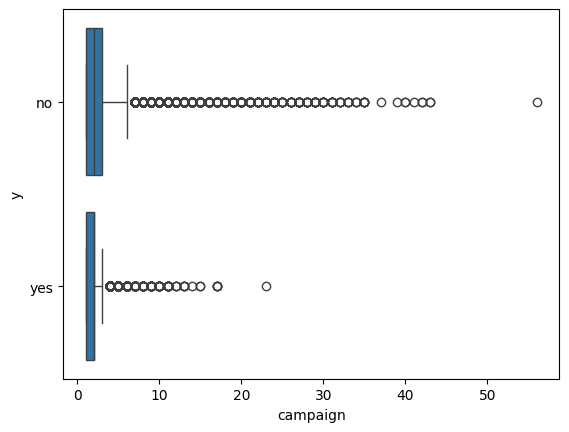

In [28]:
sns.boxplot(x='campaign', y='y', data=df_copy)

<Axes: xlabel='euribor3m', ylabel='y'>

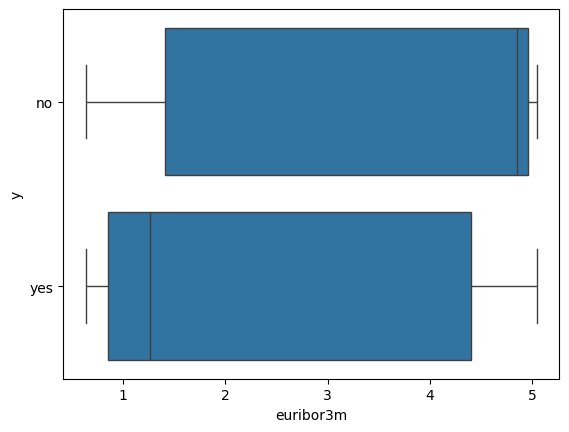

In [29]:
sns.boxplot(x='euribor3m', y='y', data=df_copy)

<Axes: xlabel='nr.employed', ylabel='y'>

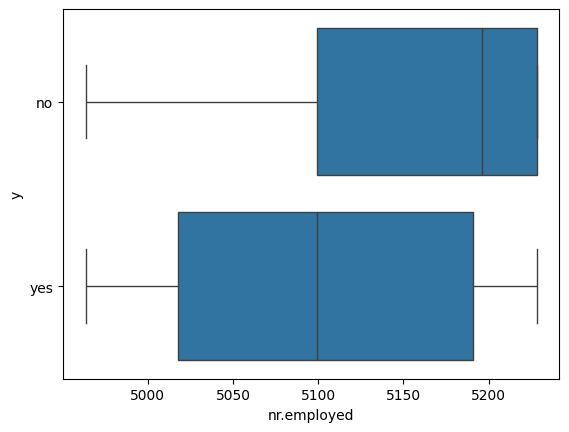

In [30]:
sns.boxplot(x='nr.employed', y='y', data=df_copy)

### Categorica vs Categorica

In [31]:
pd.crosstab(df_copy['job'] , df_copy['education'])

education      basic.4y  basic.6y  basic.9y  high.school  illiterate  \
job                                                                    
admin.               77       151       499         3329           1   
blue-collar        2318      1426      3623          878           8   
entrepreneur        137        71       210          234           2   
housemaid           474        77        94          174           1   
management          100        85       166          298           0   
retired             597        75       145          276           3   
self-employed        93        25       220          118           3   
services            132       226       388         2682           0   
student              26        13        99          357           0   
technician           58        87       384          873           0   
unemployed          112        34       186          259           0   
unknown              52        22        31           37           0   

education      professional.course  university.degree  unknown  
job                                                             
admin.                         363               5753      249  
blue-collar                    453                 94      454  
entrepreneur                   135                610       57  
housemaid                       59                139       42  
management                      89               2063      123  
retired                        241                285       98  
self-employed                  168                765       29  
services                       218                173      150  
student                         43                170      167  
technician                    3320               1809      212  
unemployed                     142                262       19  
unknown                         12                 45      131

In [32]:
pd.crosstab(df_copy['y'] , df_copy['job'], normalize=True)*100

job     admin.  blue-collar  entrepreneur  housemaid  management   retired  \
y                                                                            
no   22.020977    20.918714      3.233952   2.316209    6.302807  3.122269   
yes   3.282509     1.548995      0.301059   0.257357    0.796348  1.053705   

job  self-employed  services   student  technician  unemployed   unknown  
y                                                                         
no        3.088278  8.852093  1.456735   14.598912    2.112266  0.711372  
yes       0.361756  0.784209  0.667670    1.772361    0.349616  0.089832

In [33]:
pd.crosstab(df_copy['y'] , df_copy['education'], normalize=True)*100

education  basic.4y  basic.6y   basic.9y  high.school  illiterate  \
y                                                                   
no         9.099738  5.108284  13.528212    20.598232    0.033990   
yes        1.039138  0.456444   1.148393     2.503156    0.009712   

education  professional.course  university.degree   unknown  
y                                                            
no                   11.284840          25.488006  3.593280  
yes                   1.444596           4.054579  0.609401

In [34]:
pd.crosstab(df_copy['y'] , df_copy['marital'])

marital  divorced  married  single  unknown
y                                          
no           4136    22396    9948       68
yes           476     2532    1620       12

In [35]:
pd.crosstab(df_copy['y'] , df_copy['contact'])

contact  cellular  telephone
y                           
no          22291      14257
yes          3853        787

In [36]:
pd.crosstab(df_copy['y'] , df_copy['estaciones'])

estaciones  Invierno  Otoño  Primavera  Verano
y                                             
no                93   4402      15246   16807
yes               89    987       1701    1863

In [37]:
pd.crosstab(df_copy['y'] , df_copy['estaciones'], normalize=True)*100

estaciones  Invierno      Otoño  Primavera     Verano
y                                                    
no          0.225794  10.687579  37.015636  40.805574
yes         0.216082   2.396329   4.129844   4.523162

In [38]:
pd.crosstab(df_copy['y'] , df_copy['poutcome'])

poutcome  failure  nonexistent  success
y                                      
no           3647        32422      479
yes           605         3141      894

### OUTLIERS

In [39]:
utils.limites_outliers(df_copy, 'age')

Valor del segundo cuartil (25%): 32.00
Valor del tercer cuartil (75%): 47.00
Valor del rango intercuartil (IQR): 15.00
Los valores atípicos se definen como aquellos que caen fuera del siguiente rango:
	 - Límite inferior (considerado extremadamente bajo): 9.50
	 - Límite superior (considerado extremadamente alto): 69.50


(np.float64(9.5), np.float64(69.5))

In [40]:
utils.limites_outliers(df_copy, 'duration') # NO eliminar, igual si la llamada es muy larga, puede que interese

Valor del segundo cuartil (25%): 102.00
Valor del tercer cuartil (75%): 319.00
Valor del rango intercuartil (IQR): 217.00
Los valores atípicos se definen como aquellos que caen fuera del siguiente rango:
	 - Límite inferior (considerado extremadamente bajo): -223.50
	 - Límite superior (considerado extremadamente alto): 644.50


(np.float64(-223.5), np.float64(644.5))

In [41]:
utils.limites_outliers(df_copy, 'campaign')

Valor del segundo cuartil (25%): 1.00
Valor del tercer cuartil (75%): 3.00
Valor del rango intercuartil (IQR): 2.00
Los valores atípicos se definen como aquellos que caen fuera del siguiente rango:
	 - Límite inferior (considerado extremadamente bajo): -2.00
	 - Límite superior (considerado extremadamente alto): 6.00


(np.float64(-2.0), np.float64(6.0))

### INSIGNTS--> ESCOGER PREGUNTAS Y LAS GRAFICAS QUE LAS RESPONDAN

In [42]:
### saber que eliminar (?)